In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms import (bipartite, centrality, community, clustering, link_prediction,
                                 distance_measures)
from networkx.drawing.layout import bipartite_layout
from networkx.classes.function import degree_histogram, density, subgraph, common_neighbors

import queue, heapq

import clingo

class Node :
    def __init__(self, n, t):
        self.m_name = n
        self.m_type = t

class Edge:
    def __init__(self, n1, n2):
        self.to_node = n1
        self.from_node = n2

# == COMMUNITY ANALYTICS ===========================================================================
def intra_edges(c):
    """
    the number of intra_edges of community C
    """
    pass

def inter_edges(c):
    """
    the number of inter_edges of community C
    """
    pass

def inter_degree(u):
    """
    inter-degree for a node u in community C
    """
    pass

def inverse_average_odf(c):
    """
    inverse average out-degree faction
    compares the number of inter-edges to the number of all edges of a community C
    and averages this for the wohle community by considering the fraction for each individual node
    """
    pass

def segregation_index(c):
    """
    compares the number of expected inter-edges to the number of observed inter-edges
    normalized by the expectation
    """
    pass

def modularity(graph, comm):
    """
    modularity of a graph clustering with k communities focuses on the number of edges within a community
    compares that with the xpected such number given a null-model
    """
    return community.modularity(graph, comm)

def modularity_contribution(c):
    """
    modularity contribution of a single community c in a local context (subgraph)
    """
    pass

# == COMMUNITY DETECTION ===========================================================================
# COMODO
def comodo(graph, max_pattern_size, max_pattern_length, min_community_size):
    db = transform(graph, db)
    cpt = create_cpt(db, min_community_size)
    top_k = queue.PriorityQueue(max_pattern_length) # priority queue
    comodo_mine(top_k)

    return top_k

def transform(graph):
    return graph.edges

def create_cpt(dbmin_community_size):
    cpt = []

    return cpt

def comodo_mine(cpt, pattern, top_k, max_pattern_size, max_pattern_length, min_community_size):
    """
    branch & bouond algorithm based on an exhaustive subgroup discovery approach
    applies extended SD-Map* method
    """
    COM = {}
    min_q = heapq.nsmallest(1)

    for basic_pattern in cpt:
        p = createRefinement(pattern, basic_pattern)
        COM[basic_pattern] = p

        if p > min_community_size:
            if quality(p) > min_q:
                top_k.put(p)
                min_q = top_k.get()[0]

    if len(pattern) + 1 < max_pattern_length:
        refinements  = sortBasicPatternsByOptimisticEstimateDescending()
        for basic_pattern in refinements:
            if optimisticEstimate(COM[basic_pattern]) >= min_q:
                ccpt = getConditionalCPT(basic_pattern, cpt, min_q)
                comodo(ccpt, COM[basic_pattern], top_k)

def createRefinement(pattern, basic_pattern):
    pass

def quality(p):
    pass

def sortBasicPatternsByOptimisticEstimateDescending():
    pass

def optimisticEstimate(com):
    pass

def getConditionalCPT(basic_pattern, cpt, min_q):
    pass

# MINERLSD
def minerLSD(graph):
    """
    integrates abstract closed pattern mining with efficient pruning approaches
    """
    pass

# == CLUSTERING COEFFICIENTS =======================================================================
def clustering_coefficient(graph, nodes=None):
    return clustering(graph, nodes)

# == SIMPLE GRAPHS ANALYTICS =======================================================================
def diameter(graph):
    return distance_measures.diameter(graph)

# == CENTRALITIES ==================================================================================
def betweenness(graph):
    return centrality.betweenness_centrality(graph)

def closeness(graph, u=None):
    return centrality.closeness_centrality(graph, u)

def eigen(graph):
    try:
        result = centrality.eigenvector_centrality(graph)
    except Exception as e:
        print("ERROR IN EIGENVECTOR CENTRALITY", e)
        return False

    return result

# == NODE SIMILARITIES =============================================================================
def neighborhood_sim(graph, u, v):
    count = 1
    if graph.degree(u) == graph.degree(v):
        for n in graph.neighbors(u):
            if n == v:
                continue
            for m in graph.neighbors(v):
                if m == u:
                    continue
                if n == m:
                    count += 1

    return (count == graph.degree(u) and count == graph.degree(v))

def distance_sim(graph, u, v):
    pass

def structued_sim(graph, u, v):
    pass

# == LINK PREDICTION ===============================================================================
def cold_start_link_prediction(graph):
    """
    Solves the cold start link prediction problem for an attributed graph
    """
    def on_model(m):
        for atom in m.symbols(atoms=True):
            if "cn_lp" in str(atom):
                left_node = str(atom).split("(")[1].split(",")[0]
                right_node = str(atom).split(",")[1].split(")")[0]
                graph.add_edge(left_node, right_node)

    # setup clingo program
    control = clingo.Control()
    
    node_attributes = ["attr", "helium"]
    # node_attributes = ["work__base", "connections__group-affiliation", "biography__publisher"]
    node_node = ["connections__relatives"]
    
    attribute_dict = {}
    # preprocess attributes by mapping them to numbers
    number = -1 # choose negative numbers, since nodes have positive numbers
    for node in graph.nodes:
        for attr in node_attributes:
            all_nodes_attributes = nx.get_node_attributes(g, attr)
            if not all_nodes_attributes[node] in attribute_dict:
                attribute_dict[all_nodes_attributes[node]] = number
                number -= 1

    # setup nodes
    for node in graph.nodes:
        node_to_add = "node(" + str(node) + ")."
        control.add("base", [], node_to_add)

        # setup bipartite attribute graph
        node_attr_to_add = "node_attr(" + str(node) + ")."
        control.add("base", [], node_attr_to_add)

        for attr in node_attributes:
            node_attrs = nx.get_node_attributes(g, attr)
            attribute_of_node = attribute_dict[node_attrs[node]]
            attr_to_add = "a(" + str(attribute_of_node) + ")."
            control.add("base", [], attr_to_add)

            edge_node_attr_to_add = "edge_attr(" + str(node) + "," + str(attribute_of_node) + ")."
            control.add("base", [], edge_node_attr_to_add)
        
        # node_node_info = nx.get_node_attributes(g, "connections__relatives")

    # setup edges
    for edge in graph.edges:
        edge_to_add = "edge(" + str(edge[0]) + "," + str(edge[1]) + ")."
        control.add("base", [], edge_to_add)

    # setup rules
    control.add("base", [], "edge(Y,X) :- edge(X,Y).")
    control.add("base", [], "edge_attr(Y,X) :- edge_attr(X,Y).")

    control.add("base", [], "c(X,Y,Z) :- edge(X,Y), edge(X,Z), not edge(Y,Z), Y!=Z.")
    control.add("base", [], "c_attr(X,Y,Z) :- edge_attr(X,Y), edge_attr(X,Z), not edge_attr(Y,Z), Y!=Z.")

    control.add("base", [], "cn_lp(Y,Z) :- node_attr(Y), node_attr(Z), not edge_attr(Y,Z), 1=#count{X:c_attr(X,Y,Z)}.")

    control.ground([("base", [])])
    result = control.solve(on_model=on_model)


def structured_link_prediction(graph):
    """
    Solves one iteration of link prediction of a graph based on its structure
    """
    pass

g = nx.Graph()
for i in range(10):
    if i % 2 == 0:
        g.add_node(i, attr="TEST" + str(i*100), helium="auch")
    else:
        g.add_node(i, attr="TEST" + str((i + 1)*100), helium="Test")

# attris = nx.get_node_attributes(g, "attr")
# for node in g.nodes:
#     print(attris[node])

# for i in range(5):
#     for j in range(i + 1, 10):
#         g.add_edge(i, j)

print(g.number_of_edges())
cold_start_link_prediction(g)
print(g.number_of_edges())

0
24


In [ ]:
# == LOAD DATA & PREPROCESSING =====================================================================
# (csv have been slightly adapted to be separated by ';' since some names include ',' already)

# FIRST GRAPH - MarvelUniverse
# (node, type)
data_nodes = pd.read_csv("data/MarvelUniverse/nodes.csv", sep=";").reset_index()

# (hero, comic) - probably not needed, see paper for explanation
# data_comic_edges = pd.read_csv("data/MarvelUniverse/edges.csv", sep=";")

# (hero1, hero2)
data_marvel_edges = pd.read_csv("data/Marveluniverse/hero-network.csv", sep=";")


# SECOND GRAPH - SUPER HERO DATASET
super_nodes = pd.read_csv("data/Heroes/data.csv")

# drop all information/attributes not contributing to graph structure (decrease data size)
attributes_to_drop = ["powerstats__intelligence", "powerstats__strength", "powerstats__speed"
                      ,"powerstats__durability", "powerstats__power", "powerstats__combat"
                      ,"biography__first-appearance", "appearance__gender", "appearance__race"
                      ,"appearance__height__001", "appearance__height__002"
                      ,"appearance__weight__001", "appearance__weight__002"
                      ,"appearance__eye-color", "appearance__hair-color", "work__occupation"]
for i in range(2, 21):
    if i <= 9:
        attr_to_drop = "biography__aliases__00" + str(i)
    else:
        attr_to_drop = "biography__aliases__0" + str(i)
    attributes_to_drop.append(attr_to_drop)

for col in attributes_to_drop:
    del super_nodes[col]

super_nodes["name"] = super_nodes["name"].str.upper()

marvel_nodes = data_nodes["node"][data_nodes["type"] == "hero"].unique().tolist()

# == CREATE GRAPHS =================================================================================
marvel_graph = nx.Graph()
marvel_graph.add_nodes_from(marvel_nodes)

marvel_edges = data_marvel_edges.values.tolist()
marvel_edges = [tuple(x) for x in marvel_edges]
marvel_graph.add_edges_from(marvel_edges)

super_graph = nx.Graph()
super_graph.add_nodes_from(super_nodes)
# TODO: add edges via link prediction


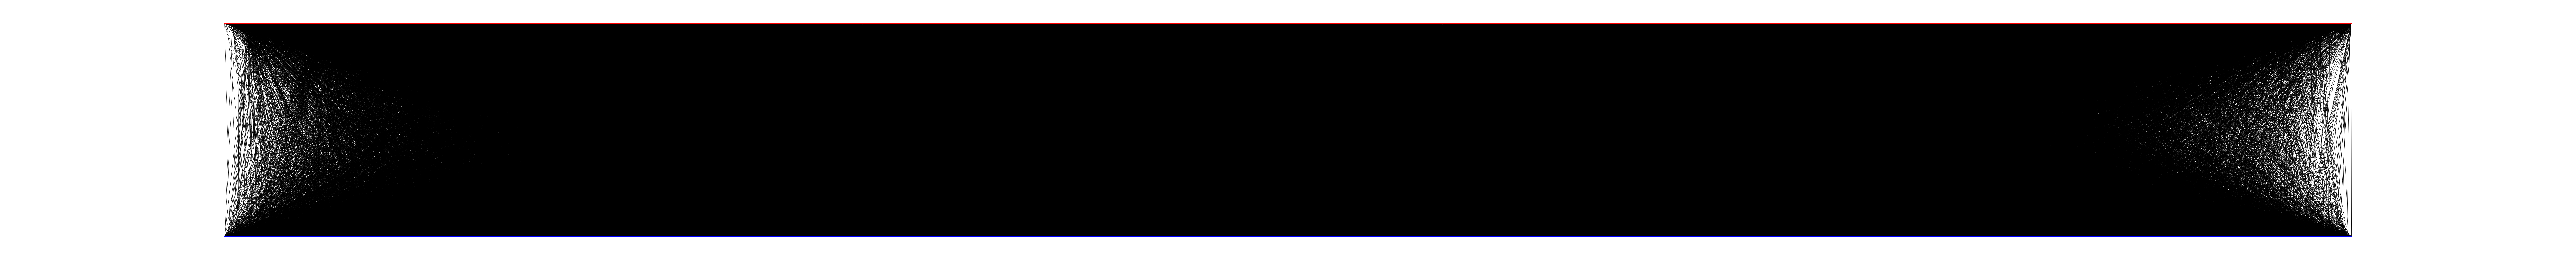

In [37]:
# # == CREATE FIRST BIPARTITE GRAPH ==================================================================
# bipartite_graph = nx.Graph()

# comic_nodes = data_nodes["node"][data_nodes["type"] == "comic"].unique().tolist()

# edges_tuple = [tuple(x) for x in data_comic_edges.values.tolist()]

# bipartite_graph.add_nodes_from(comic_nodes, bipartite=0)
# bipartite_graph.add_nodes_from(hero_nodes, bipartite=1)

# bipartite_graph.add_edges_from(edges_tuple)

# top_nodes = {n for n, d in bipartite_graph.nodes(data=True) if d["bipartite"] == 0}
# bottom_nodes = set(bipartite_graph) - top_nodes

# # == VISUALIZE BIPARTITE GRAPH =====================================================================
# plt.figure(figsize=(200, 20))
# pos = bipartite_layout(bipartite_graph, top_nodes, align="horizontal")
# color_dict = {0: "blue", 1:"red"}
# color_list = [color_dict[i[1]] for i in bipartite_graph.nodes.data("bipartite")]
# nx.draw(bipartite_graph, pos=pos, node_size=10, with_labels=False, node_color=color_list)
# plt.show()


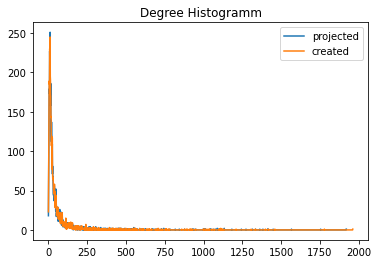

DENSIITY
Projected:  0.00828112280415326
Created:  0.00822201029483371
DIAMETER


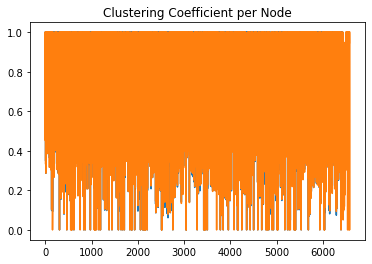

In [26]:
# == GRAPH COMPARISON ==============================================================================

# degree histogramms
marvel_degrees = degree_histogram(marvel_graph)
super_degrees = degree_histogram(super_graph)

plt.plot(marvel_degrees, label="projected")
plt.plot(super_degrees, label="created")
plt.title("Degree Histogramm")
plt.legend()
plt.show()
plt.close()

# density
print("DENSIITY")
print("Projected: ", density(marvel_graph))
print("Created: ", density(super_graph))

# diameter
print("DIAMETER")
if nx.is_connected(marvel_graph):
    print("Projected: ", diameter(marvel_graph))
if nx.is_connected(super_graph):
    print("Created: ", diameter(super_graph))

# clustering coefficients
marvel_clustering = list(clustering_coefficient(marvel_graph).values())
super_clustering = list(clustering_coefficient(super_graph).values())

plt.plot(marvel_clustering, label="MarvelUniverse")
plt.plot(super_clustering, label="SuperHeroes")
plt.title("Clustering Coefficient per Node")
plt.show()
plt.close()

# centralities
# marvel_betweenness = list(betweenness(marvel_graph).values())
# super_betweenness = list(betweenness(super_graph).values())

# plt.plot(marvel_betweenness, label="MarvelUniverse")
# plt.plot(super_betweenness, label="SuperHeroes")
# plt.title("Betweenness Centrality per Node")
# plt.show()
# plt.close()

# marvel_closeness = list(closeness(marvel_graph).values())
# super_closeness = list(closeness(super_graph).values())

# plt.plot(marvel_graph_closeness, label="MarvelUniverse")
# plt.plot(super_closeness, label="SuperHeroes")
# plt.title("Closeness Centrality per Node")
# plt.show()
# plt.close()

# marvel_eigen = list(eigen(marvel_graph).values())
# super_eigen = list(eigen(super_graph).values())

# plt.plot(marvel_eigen, label="MarvelUniverse")
# plt.plot(super_eigen, label="SuperHeroes")
# plt.title("Eigenvector Centrality per Node")
# plt.show()
# plt.close()


In [ ]:
# == COMMUNITY DETECTION ===========================================================================
# comodo(marvel_graph)
# comodo(super_graph)

minerLSD(marvel_graph)
minerLSD(super_graph)

# == GRAPH VISUALIZATION ===========================================================================

In [ ]:
# == LINK PREDICTION ===============================================================================

In [ ]:
# == 2ND GRAPH COMPARISON ==========================================================================
# degree histogramms
marvel_degrees = degree_histogram(marvel_graph)
super_degrees = degree_histogram(super_graph)

plt.plot(marvel_degrees, label="projected")
plt.plot(super_degrees, label="created")
plt.title("Degree Histogramm")
plt.legend()
plt.show()

# density
print("DENSIITY")
print("Projected: ", density(marvel_graph))
print("Created: ", density(super_graph))

# diameter
print("DIAMETER")
if nx.is_connected(marvel_graph):
    print("Projected: ", diameter(marvel_graph))
if nx.is_connected(super_graph):
    print("Created: ", diameter(super_graph))

# clustering coefficients
marvel_clustering = list(clustering_coefficient(marvel_graph).values())
super_clustering = list(clustering_coefficient(super_graph).values())

plt.plot(marvel_clustering, label="MarvelUniverse")
plt.plot(super_clustering, label="SuperHeroes")
plt.title("Clustering Coefficient per Node")
plt.show()

# centralities
# marvel_betweenness = list(betweenness(marvel_graph).values())
# super_betweenness = list(betweenness(super_graph).values())

# plt.plot(marvel_betweenness, label="MarvelUniverse")
# plt.plot(super_betweenness, label="SuperHeroes")
# plt.title("Betweenness Centrality per Node")
# plt.show()

# marvel_closeness = list(closeness(marvel_graph).values())
# super_closeness = list(closeness(super_graph).values())

# plt.plot(marvel_graph_closeness, label="MarvelUniverse")
# plt.plot(super_closeness, label="SuperHeroes")
# plt.title("Closeness Centrality per Node")
# plt.show()

# marvel_eigen = list(eigen(marvel_graph).values())
# super_eigen = list(eigen(super_graph).values())

# plt.plot(marvel_eigen, label="MarvelUniverse")
# plt.plot(super_eigen, label="SuperHeroes")
# plt.title("Eigenvector Centrality per Node")
# plt.show()

In [ ]:
# == 2ND COMMUNITY DETECTION =======================================================================
# comodo(marvel_graph)
# comodo(super_graph)

minerLSD(marvel_graph)
minerLSD(super_graph)

# == GRAPH VISUALIZATION ===========================================================================